In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, roc_curve, auc,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [66]:
filename = 'data_evaluacion.csv'
#filename='data.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [67]:
#df.nunique()

In [68]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [69]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan

for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 


In [70]:
#Ver si existen datos nulos
#df.isnull().sum()

In [71]:
#Dividir las variables x y y

x = df.drop('ingresos', axis=1)
y = df['ingresos']


In [72]:
categorizar = ['sexo', 'raza', 'empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'pais_natal']

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in categorizar:
    x[col] = le.fit_transform(x[col])

#Get dami
#x = pd.get_dummies(x, columns=categorizar)
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48838    <=50K
48839    <=50K
48840     >50K
Name: ingresos, Length: 48841, dtype: object

In [73]:
#Dividir en daos de prueba y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [74]:
y_test

40658    <=50K
12928    <=50K
8659     <=50K
48446    <=50K
42402     >50K
         ...  
19123    <=50K
44052    <=50K
34536     >50K
19113    <=50K
5719     <=50K
Name: ingresos, Length: 14653, dtype: object

In [75]:
#Normalizar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [76]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB()

In [77]:
y_pred = bayes.predict(x_test)
print("Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes
Accuracy: 0.8092540776632772
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88     11147
        >50K       0.70      0.36      0.48      3506

    accuracy                           0.81     14653
   macro avg       0.76      0.66      0.68     14653
weighted avg       0.79      0.81      0.79     14653



In [78]:
y_test

40658    <=50K
12928    <=50K
8659     <=50K
48446    <=50K
42402     >50K
         ...  
19123    <=50K
44052    <=50K
34536     >50K
19113    <=50K
5719     <=50K
Name: ingresos, Length: 14653, dtype: object

In [79]:
#precision=precision_score(y_test,y_pred)
#precision

# Evalaucion del modelo
print('Train Accuracy : %.5f' % bayes.score(x_train, y_train))
print('Test Accuracy : %.5f' % bayes.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.80476
Test Accuracy : 0.80925
Precisión del modelo: 0.8092540776632772
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88     11147
        >50K       0.70      0.36      0.48      3506

    accuracy                           0.81     14653
   macro avg       0.76      0.66      0.68     14653
weighted avg       0.79      0.81      0.79     14653



In [80]:
cm= confusion_matrix(y_test,y_pred)
print("Matriz de confusion")
cm

Matriz de confusion


array([[10593,   554],
       [ 2241,  1265]], dtype=int64)

<Figure size 5000x2000 with 0 Axes>

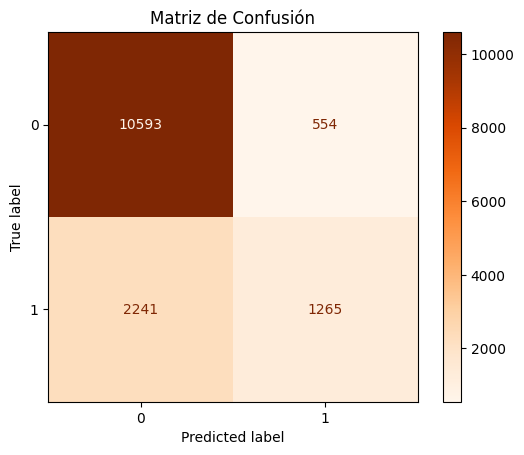

In [84]:
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

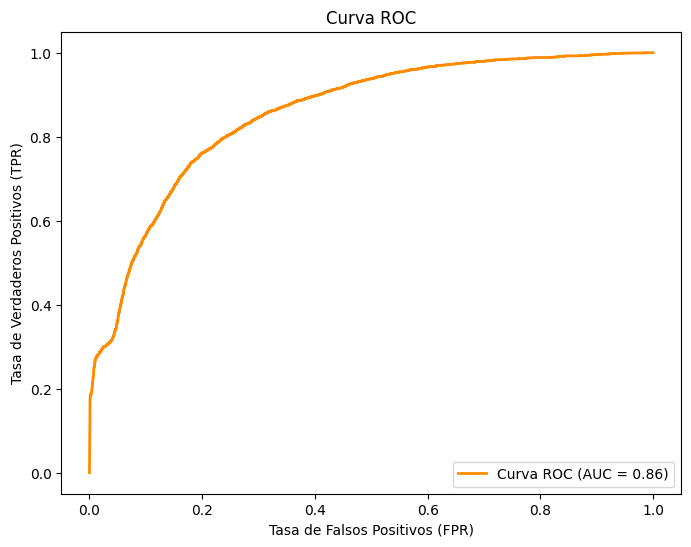

In [ ]:
# Calcular la probabilidad predicha para la clase positiva
le = LabelEncoder()
y_test = le.fit_transform(y_test) 
y_prob = bayes.predict_proba(x_test)[:, 1]
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
x_n=np.asarray([50,	6,83311,9,13,2,4,0,4,1,0,0,13,39]).reshape(1,-1)
predict=bayes.predict(x_n)
predict[0]

'<=50K'

## Bibliografias
### Awan, A. A., & Navlani, A. (2023, March 3). Naive Bayes Classification Tutorial using Scikit-learn. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn